In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
# i = Consumer ID
# j = Product Category
data=pd.read_csv('train.csv')

In [18]:
data.iloc[0,0:]

i             4.000000
j             7.000000
t             0.000000
price         2.137451
advertised    0.000000
Name: 0, dtype: float64

In [23]:
data.groupby('i')['j'].value_counts()

i     j 
0     6      8
      39     4
      0      2
      1      2
      7      2
      18     2
      2      1
      8      1
      16     1
      27     1
      30     1
1     6     10
      25     4
      33     4
      30     2
      0      1
      10     1
      12     1
      14     1
      26     1
      28     1
      39     1
2     6      5
      34     5
      39     5
      5      4
      1      2
      3      2
      4      2
      33     2
            ..
1998  0      2
      7      2
      21     2
      29     2
      1      1
      2      1
      9      1
      14     1
      16     1
      23     1
      28     1
      36     1
1999  0      6
      6      5
      10     5
      3      4
      14     3
      5      2
      11     2
      2      1
      4      1
      7      1
      8      1
      9      1
      13     1
      15     1
      16     1
      20     1
      24     1
      25     1
Name: j, Length: 30679, dtype: int64

In [30]:
data.groupby('j')['i'].value_counts()

j   i   
0   1205    12
    454     11
    719      9
    1407     9
    1015     8
    1480     8
    1674     8
    135      7
    151      7
    756      7
    777      7
    879      7
    1023     7
    1045     7
    1070     7
    1598     7
    1663     7
    1706     7
    1727     7
    1814     7
    1885     7
    1899     7
    1934     7
    19       6
    75       6
    169      6
    183      6
    221      6
    406      6
    518      6
            ..
39  1864     1
    1870     1
    1871     1
    1877     1
    1882     1
    1885     1
    1886     1
    1888     1
    1891     1
    1892     1
    1897     1
    1898     1
    1901     1
    1907     1
    1914     1
    1922     1
    1926     1
    1930     1
    1933     1
    1938     1
    1941     1
    1956     1
    1963     1
    1969     1
    1971     1
    1972     1
    1982     1
    1988     1
    1991     1
    1996     1
Name: i, Length: 30679, dtype: int64

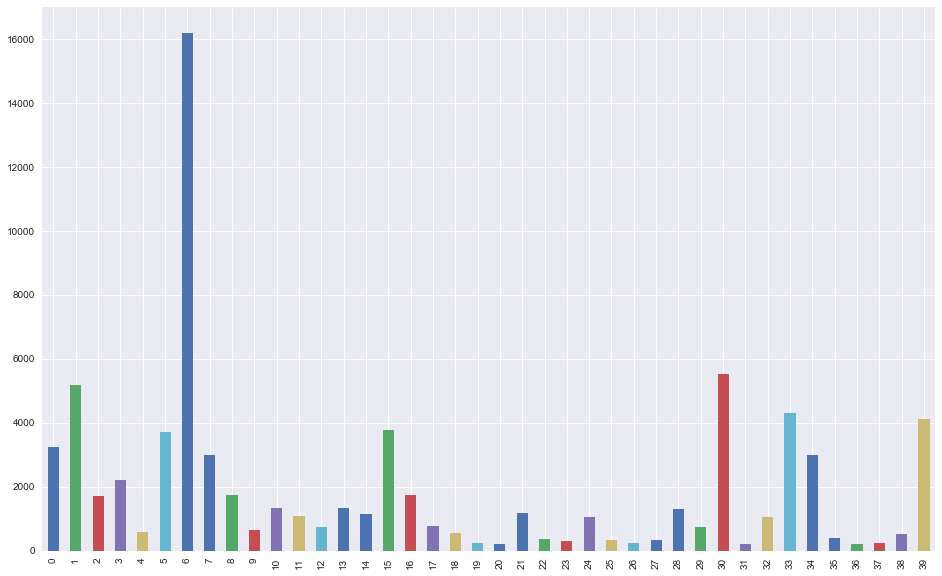

In [105]:
data['j'].value_counts().sort_index().plot(kind='bar',figsize=(16,10))

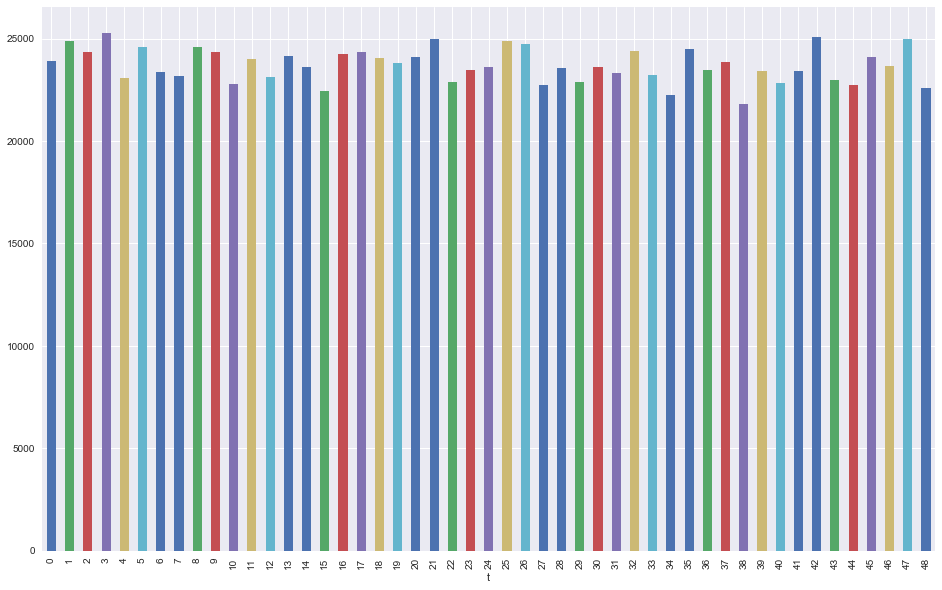

In [62]:
#Total Sale of item week wise
data.groupby('t')['j'].sum().plot(kind='bar',figsize=(16,10))

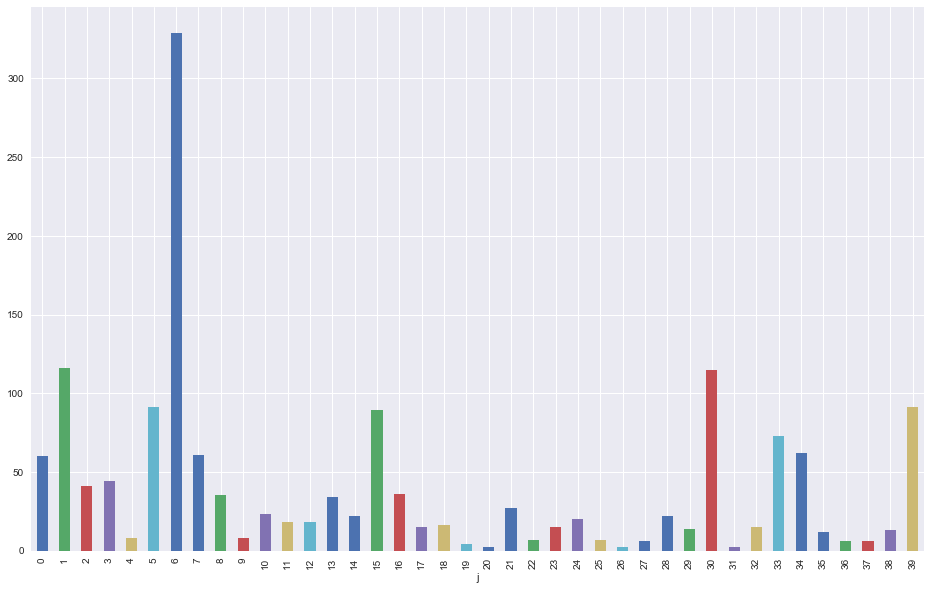

In [103]:
#Sale by item in 0th week
data.groupby('t')['j'].value_counts()[0].sort_index().plot(kind='bar',figsize=(16,10))

In [112]:
#pd.get_dummies(data['t'],prefix='Week')
data[data['t']==2].groupby('i')['j'].sum()#.value_counts()

i
3        30
4        15
7        39
8        24
9        47
10       11
13        6
16       15
20       15
21       39
22       24
24       45
25       14
27       11
28       43
29        1
30       37
31       55
32       30
33        5
34        7
38      104
39        6
44        5
45        5
46       20
47        9
48       39
50       29
51       84
       ... 
1935      7
1939      7
1940     30
1943     12
1944      3
1948     19
1949     31
1950     50
1953     15
1954     36
1956     34
1958     30
1960      8
1961      6
1962     39
1963     34
1969     19
1970      8
1974     30
1977      0
1982     12
1983     39
1985     11
1986     13
1991     26
1992     13
1993      8
1994      1
1995     16
1997     11
Name: j, Length: 1204, dtype: int64

In [115]:
data['j'].value_counts()


6     16190
30     5520
1      5188
33     4312
39     4120
15     3778
5      3706
0      3251
7      2996
34     2975
3      2214
16     1748
8      1744
2      1714
13     1342
10     1332
28     1297
21     1172
14     1148
11     1073
32     1064
24     1043
17      769
29      749
12      741
9       654
4       595
18      543
38      505
35      377
22      366
25      331
27      320
23      313
19      246
37      245
26      222
36      211
20      194
31      194
Name: j, dtype: int64

In [113]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [119]:
cust_prod=pd.crosstab(data['i'], data['j'])

In [120]:
cust_prod.shape

(2000, 40)

In [128]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(cust_prod)
pca_samples = pca.transform(cust_prod)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(cust_prod)
pca_samples = pca.transform(cust_prod)

In [129]:
ps = pd.DataFrame(pca_samples)
ps.head()

,0,1
0,-0.848724,-1.202396
1,2.149365,0.055733
2,-3.917025,-2.256751
3,-0.864868,8.847555
4,2.240587,-0.989839


(2000, 2)
          0         1
0 -0.848724 -1.202396
1  2.149365  0.055733
2 -3.917025 -2.256751
3 -0.864868  8.847555
4  2.240587 -0.989839


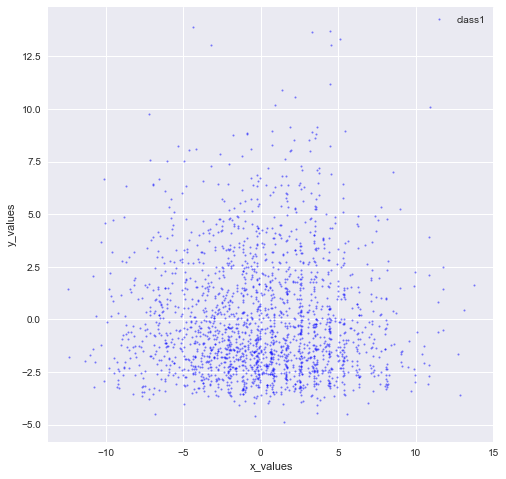

In [131]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
tocluster = pd.DataFrame(ps[[0,1]])
print (tocluster.shape)
print (tocluster.head())

fig = plt.figure(figsize=(8,8))
plt.plot(tocluster[0], tocluster[1], 'o', markersize=2, color='blue', alpha=0.5, label='class1')

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.show()

In [132]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

clusterer = KMeans(n_clusters=4,random_state=42).fit(tocluster)
centers = clusterer.cluster_centers_
c_preds = clusterer.predict(tocluster)
print(centers)

[[-0.72085816 -1.4354253 ]
 [ 0.65865877  4.34453063]
 [-5.97636058 -0.08331157]
 [ 4.9619953  -0.89346482]]


In [133]:
print (c_preds[0:100])


[0 3 2 1 3 0 0 3 0 0 1 3 3 0 1 3 2 3 0 2 2 2 2 1 1 0 3 3 0 2 0 2 0 0 2 0 0
 1 1 2 1 2 3 0 2 0 1 1 0 0 1 1 3 3 3 0 1 0 0 3 3 0 0 3 0 1 3 1 0 3 3 2 0 0
 0 1 2 2 3 1 0 3 3 0 3 2 3 0 0 1 3 1 3 0 1 3 0 2 2 2]


['orange', 'green', 'purple', 'blue', 'green', 'orange', 'orange', 'green', 'orange', 'orange']


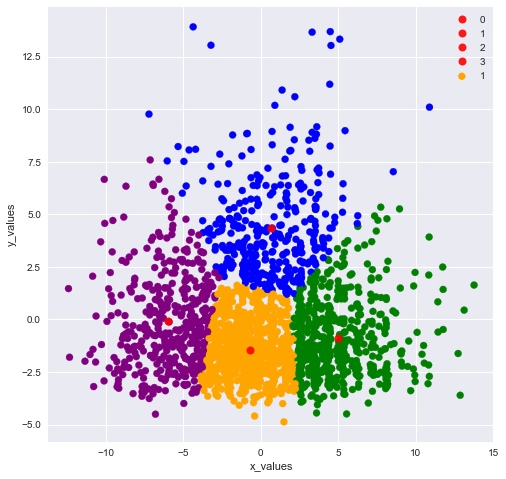

In [135]:
import matplotlib
fig = plt.figure(figsize=(8,8))
colors = ['orange','blue','purple','green']
colored = [colors[k] for k in c_preds]
print (colored[0:10])
plt.scatter(tocluster[0],tocluster[1],  color = colored)
for ci,c in enumerate(centers):
    plt.plot(c[0], c[1], 'o', markersize=8, color='red', alpha=0.9, label=''+str(ci))

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.show()

In [136]:
clust_prod = cust_prod.copy()
clust_prod['cluster'] = c_preds

clust_prod.head(10)

j,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,cluster
i,,,,,,,,,,,,,,,,,,,,,
0,2,2,1,0,0,0,8,2,1,0,...,0,0,0,0,0,0,0,0,4,0
1,1,0,0,0,0,0,10,0,0,0,...,0,0,4,0,0,0,0,0,1,3
2,0,2,0,2,2,4,5,1,1,0,...,0,0,2,5,0,0,0,0,5,2
3,0,2,0,1,0,3,7,0,0,0,...,0,2,1,1,1,0,0,0,2,1
4,0,1,0,1,0,1,11,3,0,0,...,0,0,19,4,0,0,0,0,3,3
5,1,3,0,1,1,1,10,1,0,0,...,2,1,2,3,0,0,0,0,4,0
6,0,6,1,0,0,2,6,1,1,0,...,0,0,1,1,0,0,0,0,0,0
7,1,2,0,0,1,0,11,10,2,0,...,0,0,2,0,0,0,0,0,2,3
8,0,1,1,1,1,0,10,2,0,3,...,0,1,0,1,1,0,0,2,4,0


(2000, 41)


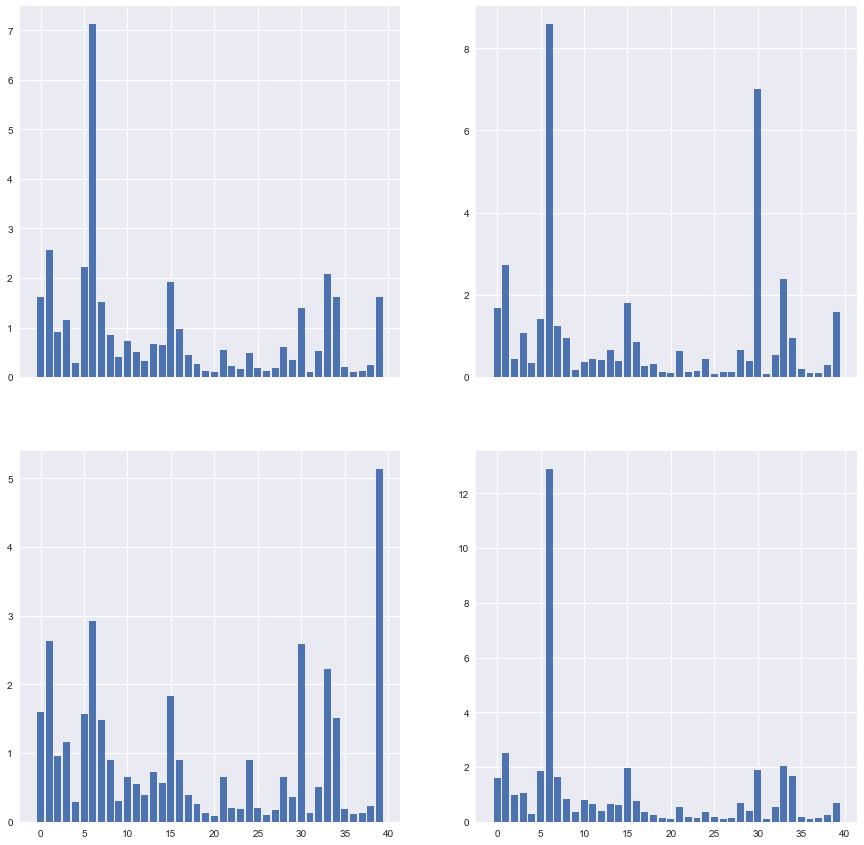

In [137]:
print (clust_prod.shape)
f,arr = plt.subplots(2,2,sharex=True,figsize=(15,15))

c1_count = len(clust_prod[clust_prod['cluster']==0])

c0 = clust_prod[clust_prod['cluster']==0].drop('cluster',axis=1).mean()
arr[0,0].bar(range(len(clust_prod.drop('cluster',axis=1).columns)),c0)
c1 = clust_prod[clust_prod['cluster']==1].drop('cluster',axis=1).mean()
arr[0,1].bar(range(len(clust_prod.drop('cluster',axis=1).columns)),c1)
c2 = clust_prod[clust_prod['cluster']==2].drop('cluster',axis=1).mean()
arr[1,0].bar(range(len(clust_prod.drop('cluster',axis=1).columns)),c2)
c3 = clust_prod[clust_prod['cluster']==3].drop('cluster',axis=1).mean()
arr[1,1].bar(range(len(clust_prod.drop('cluster',axis=1).columns)),c3)
plt.show()

In [138]:
c0.sort_values(ascending=False)[0:10]

j
6     7.127989
1     2.559775
5     2.218003
33    2.090014
15    1.922644
0     1.623066
34    1.613221
39    1.609001
7     1.521800
30    1.400844
dtype: float64

In [139]:
c1.sort_values(ascending=False)[0:10]

j
6     8.589235
30    7.019830
1     2.725212
33    2.396601
15    1.793201
0     1.688385
39    1.580737
5     1.405099
7     1.243626
3     1.073654
dtype: float64

In [140]:
c2.sort_values(ascending=False)[0:10]

j
39    5.137845
6     2.919799
1     2.631579
30    2.583960
33    2.220551
15    1.834586
0     1.593985
5     1.573935
34    1.508772
7     1.476190
dtype: float64

In [141]:
c3.sort_values(ascending=False)[0:10]

j
6     12.895717
1      2.525140
33     2.037244
15     1.947858
30     1.890130
5      1.871508
34     1.659218
7      1.649907
0      1.610801
3      1.035382
dtype: float64

In [150]:
data

,i,j,t,price,advertised
0,4,7,0,2.137451,0
1,6,1,0,0.863341,0
2,8,6,0,0.799155,0
3,8,25,0,3.023893,0
4,9,6,0,0.799155,0
5,10,30,0,1.961365,0
6,10,38,0,1.537678,0
7,11,5,0,1.750835,0
8,11,6,0,0.799155,0
9,11,18,0,1.961464,0


In [145]:
40*2000*48

3840000